# Sudden Stop Model

In this notebook we replicate the baseline model exposed in 

`From Sudden Stops to Fisherian Deflation, Quantitative Theory and Policy` by __Anton Korinek and Enrique G. Mendoza__

The file `sudden_stop.yaml` which is printed below, describes the model, and must be included in the same directory as this notebook.

## importing necessary functions

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from dolo import *
from dolo.algos.dtmscc.time_iteration import time_iteration
from dolo.algos.dtmscc.simulations import plot_decision_rule, simulate

## writing the model

In [3]:
filename = 'https://raw.githubusercontent.com/EconForge/dolo/master/examples/models/sudden_stop.yaml'
# filename = 'sudden_stop.yaml'
# the model file is coded in a separate file called sudden_stop.yaml
# note how the borrowing constraint is implemented as complementarity condition
pcat(filename)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69


## importing the model

Note, that residuals, are not zero at the calibration we supply. This is because the representative agent is impatient
and we have $\beta<1/R$. In this case it doesn't matter.

By default, the calibrated value for endogenous variables are used as a (constant) starting point for the decision rules.

In [4]:
model = yaml_import(filename)
model

Model:
------
name: "Sudden Stop (General)"
type: "dtmscc"
file: "https://raw.githubusercontent.com/EconForge/dolo/master/examples/models/sudden_stop.yaml

Equations:
----------

transition
 1  : 0.0000 : l = b(-1)

arbitrage
 1  : 0.0000 : lam = b/c
 2  : 0.0215 : 1 - beta*(c(1)/c)**(-sigma)*R    |  lam_inf <= lam <= inf

value
 1  : 0.0000 : V = c**(1.0-sigma)/(1.0-sigma) + beta*V(1)
 2  : 0.0000 : Vc = c**(1.0-sigma)/(1.0-sigma)

definitions
 1  : c = 1 + y + l*R - b

In [5]:
# to avoid numerical glitches we choose a relatively high number of grid points
mdr = time_iteration(model, verbose=True, grid={'orders':[1000]})

Solving WITH complementarities.
------------------------------------------------
| N   |  Error     | Gain     | Time     | nit |
------------------------------------------------
|   1 |  5.014e-01 |      nan |    0.488 |   7 |
|   2 |  1.600e-01 |    0.319 |    0.368 |   6 |
|   3 |  7.472e-02 |    0.467 |    0.284 |   6 |
|   4 |  4.065e-02 |    0.544 |    0.326 |   5 |
|   5 |  2.388e-02 |    0.587 |    0.462 |   5 |
|   6 |  1.933e-02 |    0.809 |    0.474 |   9 |
|   7 |  1.609e-02 |    0.832 |    0.334 |   6 |
|   8 |  1.370e-02 |    0.852 |    0.259 |   5 |
|   9 |  1.187e-02 |    0.867 |    0.185 |   4 |
|  10 |  1.049e-02 |    0.883 |    0.161 |   3 |
|  11 |  9.381e-03 |    0.894 |    0.140 |   3 |
|  12 |  8.467e-03 |    0.903 |    0.139 |   3 |
|  13 |  7.711e-03 |    0.911 |    0.222 |   3 |
|  14 |  7.060e-03 |    0.916 |    0.137 |   3 |
|  15 |  6.503e-03 |    0.921 |    0.091 |   2 |
|  16 |  6.016e-03 |    0.925 |    0.137 |   2 |
|  17 |  4.611e-03 |    0.766 |    0.

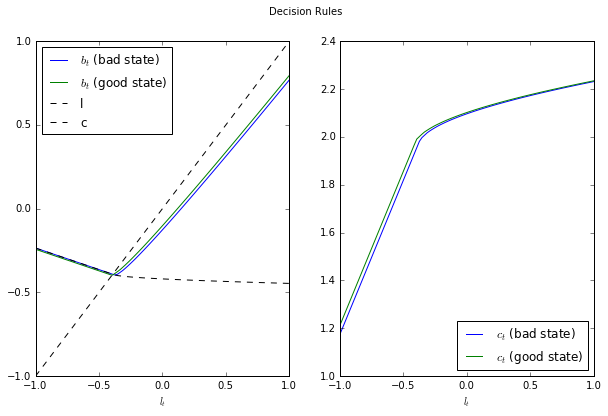

In [6]:
# produce the plots
n_steps = 100

figure(figsize(10,6))
subplot(121)
plot_decision_rule(model, mdr, 'l', 'b', i0=0, n_steps=n_steps, label='$b_t$ (bad state)' )
plot_decision_rule(model, mdr, 'l', 'b', i0=1, n_steps=n_steps, label='$b_t$ (good state)' )
plot_decision_rule(model, mdr, 'l', 'l', i0=1, n_steps=n_steps, linestyle='--', color='black' )
#plot(df['l'], df['l'], linestyle='--', color='black')

# to plot the borrowing limit, we produce a dataframe df which contains all series
# (note that we don't supply a variable name to plot, only the state 'l')

lam_inf = model.get_calibration('lam_inf')
df = plot_decision_rule(model, mdr, 'l', i0=0, n_steps=n_steps)
plot(df['l'], lam_inf*df['c'], linestyle='--', color='black')

xlabel('$l_t$')

legend(loc= 'upper left')


subplot(122)
plot_decision_rule(model, mdr, 'l', 'c', i0=0, n_steps=n_steps, label='$c_t$ (bad state)' )
plot_decision_rule(model, mdr, 'l', 'c', i0=1, n_steps=n_steps, label='$c_t$ (good state)' )
legend(loc= 'lower right')
xlabel('$l_t$')

suptitle("Decision Rules")


In [7]:
## stochastic simulations

In [8]:
i_0 = 1 # we start from the good state
sim = simulate(model, mdr, i_0, s0=0.5, n_exp=1, horizon=100) # markov_indices=markov_indices)

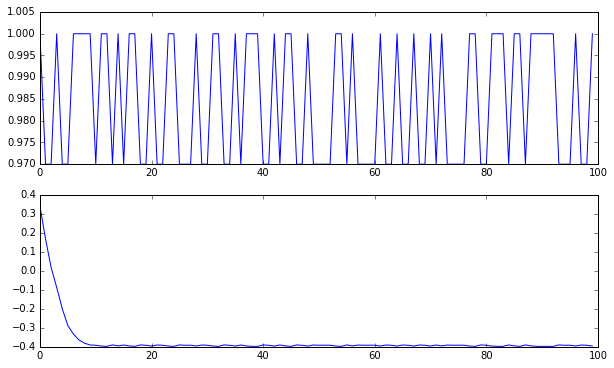

In [9]:
subplot(211)
plot(sim['y'])
subplot(212)
plot(sim['b'])

## Sensitivity analysis

Here we want to compare the saving behaviour as a function of risk aversion $\sigma$.
We contrast the baseline $\sigma=2$ with the high aversion scenario $\sigma=16$.

In [10]:
# we solve the model with sigma=16
model.set_calibration(sigma=16.0)
mdr_high_gamma = time_iteration(model, verbose=True, grid={'orders':[1000]})

Solving WITH complementarities.
------------------------------------------------
| N   |  Error     | Gain     | Time     | nit |
------------------------------------------------


    Did not converge


|   1 |  5.133e-01 |      nan |    0.689 |  10 |
|   2 |  1.703e-01 |    0.332 |    0.502 |   8 |
|   3 |  8.435e-02 |    0.495 |    0.515 |   7 |
|   4 |  5.005e-02 |    0.593 |    0.472 |   7 |
|   5 |  3.292e-02 |    0.658 |    0.365 |   7 |
|   6 |  2.313e-02 |    0.703 |    0.378 |   7 |
|   7 |  1.702e-02 |    0.736 |    0.453 |   7 |
|   8 |  1.295e-02 |    0.761 |    0.368 |   7 |
|   9 |  1.011e-02 |    0.780 |    0.346 |   7 |
|  10 |  8.045e-03 |    0.796 |    0.336 |   7 |
|  11 |  6.501e-03 |    0.808 |    0.380 |   7 |
|  12 |  5.316e-03 |    0.818 |    0.394 |   7 |
|  13 |  4.387e-03 |    0.825 |    0.415 |   6 |
|  14 |  3.647e-03 |    0.831 |    0.529 |   7 |
|  15 |  3.048e-03 |    0.836 |    0.448 |   7 |
|  16 |  2.558e-03 |    0.839 |    0.319 |   6 |
|  17 |  2.206e-03 |    0.863 |    0.350 |   6 |
|  18 |  2.010e-03 |    0.911 |    0.323 |   6 |
|  19 |  1.842e-03 |    0.916 |    0.293 |   5 |
|  20 |  1.699e-03 |    0.922 |    0.241 |   5 |
|  21 |  1.580e-03 |

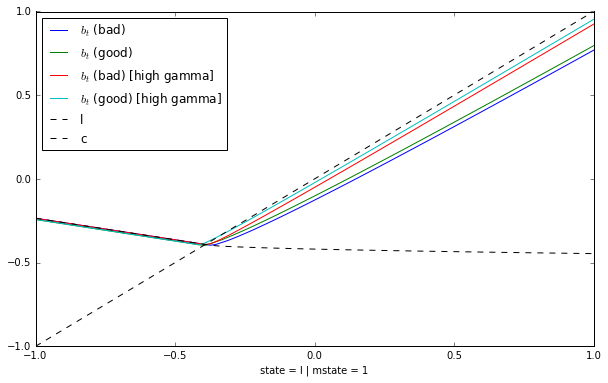

In [11]:
# now we compare the decision rules with low and high risk aversion
plot_decision_rule(model, mdr, 'l', 'b', i0=0, n_steps=n_steps, label='$b_t$ (bad)' )
plot_decision_rule(model, mdr, 'l', 'b', i0=1, n_steps=n_steps, label='$b_t$ (good)' )
plot_decision_rule(model, mdr_high_gamma, 'l', 'b', i0=0, n_steps=n_steps, label='$b_t$ (bad) [high gamma]' )
plot_decision_rule(model, mdr_high_gamma, 'l', 'b', i0=1, n_steps=n_steps, label='$b_t$ (good) [high gamma]' )
plot(df['l'], df['l'], linestyle='--', color='black')
plot(df['l'], -0.2*df['c'], linestyle='--', color='black')
legend(loc= 'upper left')